(-0.11486377916798893,
 0.12798982875071077,
 -0.15919971259604235,
 0.18031836111219385)

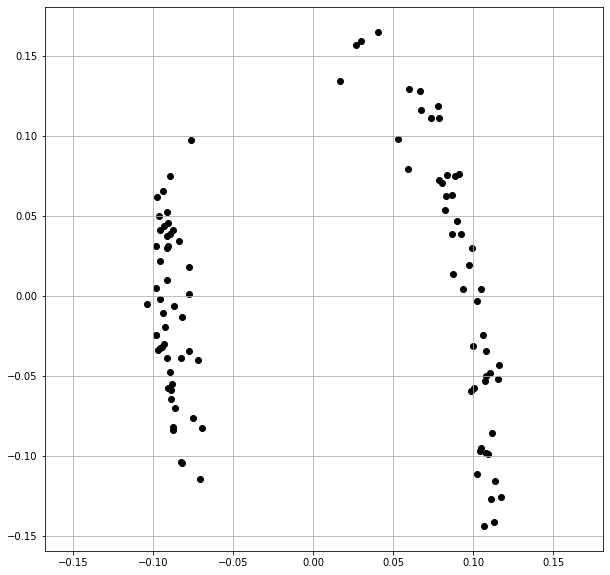

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score
from numpy import linalg as LA
from scipy.spatial.distance import pdist, cdist, squareform
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, cdist, squareform
from sklearn.decomposition import PCA
from functions import *


### creating the weird dataset


# Load Iris data
data = load_iris()
X = data.data
y = data.target
X = X[np.where(y<2)]


c = 400
n = len(X)
### interpoint distance matrix of Y; blownup!
distance_mx = squareform(pdist(X, metric='euclidean'))
blownup_distance_matrix = distance_mx/c +  np.ones((n,n))- np.identity(n)
### MDS reconstruction of the blownup interpoint distances, and corresponding interpoint distances
X_transformed = cMDS(blownup_distance_matrix, n-1)

std = 0.2 #np.var(X, axis=0, ddof=0).sum()**0.5 / X.shape[1]

mean_vec = X_transformed.mean(axis=0)
# Step 1: Fit PCA without outlier
pca_init = PCA(n_components=2)
pca_init.fit(X_transformed)
U = pca_init.components_[:2]  # first 2 PCs

for i in range(0):


    rng = np.random.default_rng()
    r = rng.standard_normal(X_transformed.shape[1])
    r_perp = r - U.T @ (U @ r)
    #r_perp /= np.linalg.norm(r_perp)
    outlier = mean_vec + r_perp * std

    # Add outlier

    X_transformed = np.vstack([X_transformed, outlier, -outlier]) # 0.99*outlier, -outlier, -0.99*outlier])

#X_transformed = np.random.permutation(X_transformed)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

fig, ax = plt.subplots(figsize=(10,10))


ax.scatter(X_pca[:,0], X_pca[:,1], c='black')
ax.grid('on')
ax.axis('equal')

[Text(0, -25.0, ''),
 Text(0, -20.0, ''),
 Text(0, -15.0, ''),
 Text(0, -10.0, ''),
 Text(0, -5.0, ''),
 Text(0, 0.0, ''),
 Text(0, 5.0, ''),
 Text(0, 10.0, ''),
 Text(0, 15.0, ''),
 Text(0, 20.0, '')]

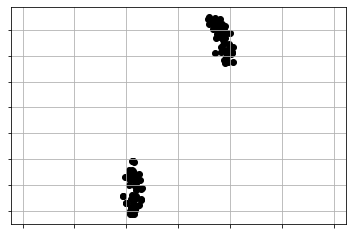

In [2]:
# Fit t-SNE
tsne = TSNE(n_components=2, perplexity=20)
X_tsne = tsne.fit_transform(X_transformed)
fig, ax = plt.subplots()

ax.scatter(X_tsne[:,0], X_tsne[:,1], c='black')
ax.grid('on')
ax.axis('equal')


ax.set_xticklabels([])
ax.set_yticklabels([])

#plt.savefig('tsne_example_intro')


/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[Text(0, -20.0, ''),
 Text(0, -15.0, ''),
 Text(0, -10.0, ''),
 Text(0, -5.0, ''),
 Text(0, 0.0, ''),
 Text(0, 5.0, ''),
 Text(0, 10.0, '')]

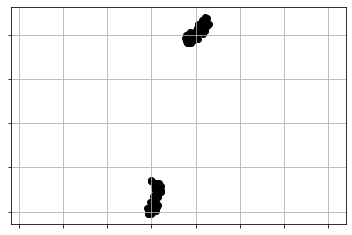

In [3]:

import umap
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_transformed)

fig, ax = plt.subplots()
ax.scatter(X_umap[:,0], X_umap[:,1], c='black')
ax.grid('on')
ax.axis('equal')


ax.set_xticklabels([])
ax.set_yticklabels([])

#plt.savefig('umap_example_intro')


In [4]:
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred_orig = kmeans.fit_predict(X_transformed)


kmeans = KMeans(n_clusters=2, random_state=42)
y_pred_tsne = kmeans.fit_predict(X_tsne)


kmeans = KMeans(n_clusters=2, random_state=42)
y_pred_umap = kmeans.fit_predict(X_umap)


/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/noahbergam/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
print('rand score between 2-MEANS LABELS on TSNE and UMAP projections = ', adjusted_rand_score(y_pred_tsne, y_pred_umap))
print('this means they output the SAME CLUSTERING')

rand score between 2-MEANS LABELS on TSNE and UMAP projections =  1.0
this means they output the SAME CLUSTERING


In [11]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from permetrics.clustering import ClusteringMetric

# 1. Generate sample data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.8, random_state=42)

# 2. Perform clustering (e.g., K-Means)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

# 3. Calculate the Dunn index using Permetrics
cm = ClusteringMetric(X, y_pred)
dunn_index = cm.dunn_index()

ValueError: To calculate internal metrics, you need to pass X.

In [15]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


### SILHOUETTE SCORES
print('SILHOUETTE ON LOW-DIM tsne (w.r.t to k-means on low-dim)', silhouette_score(X_tsne, y_pred_tsne))
print('SILHOUETTE ON LOW-DIM umap (w.r.t to k-means on low-dim)', silhouette_score(X_umap, y_pred_tsne))
print('SILHOUETTE ON HIGH-DIM (w.r.t to k-means on low-dim)', silhouette_score(X_transformed, y_pred_tsne))
print('')
### CALINSKI-HARABASZ
print('CALINSKI ON LOW-DIM tsne (w.r.t to k-means on low-dim)', calinski_harabasz_score(X_tsne, y_pred_tsne))
print('CALINSKI ON LOW-DIM umap (w.r.t to k-means on low-dim)', calinski_harabasz_score(X_umap, y_pred_tsne))
print('CALINSKI ON HIGH-DIM (w.r.t to k-means on low-dim)', calinski_harabasz_score(X_transformed, y_pred_tsne))
print('')
### DAVIES-BOUDLIN
print('DAVIES ON LOW-DIM tsne (w.r.t to k-means on low-dim)', davies_bouldin_score(X_tsne, y_pred_tsne))
print('DAVIES ON LOW-DIM umap (w.r.t to k-means on low-dim)', davies_bouldin_score(X_umap, y_pred_tsne))
print('DAVIES ON HIGH-DIM (w.r.t to k-means on low-dim)', davies_bouldin_score(X_transformed, y_pred_tsne))
print('')
print('')

from permetrics.clustering import ClusteringMetric

### DUNN
print('DUNN ON LOW-DIM tsne (w.r.t to k-means on low-dim)', ClusteringMetric(X=X_tsne, y_pred=y_pred_tsne).dunn_index())
print('DUNN ON LOW-DIM umap (w.r.t to k-means on low-dim)', ClusteringMetric(X=X_umap,  y_pred=y_pred_tsne).dunn_index())
print('DUNN ON HIGH-DIM (w.r.t to k-means on low-dim)', ClusteringMetric(X=X_transformed,  y_pred=y_pred_tsne).dunn_index())
print('')
print('')

SILHOUETTE ON LOW-DIM tsne (w.r.t to k-means on low-dim) 0.88847375
SILHOUETTE ON LOW-DIM umap (w.r.t to k-means on low-dim) 0.9216134
SILHOUETTE ON HIGH-DIM (w.r.t to k-means on low-dim) 0.006084161156767708

CALINSKI ON LOW-DIM tsne (w.r.t to k-means on low-dim) 2981.7482410794155
CALINSKI ON LOW-DIM umap (w.r.t to k-means on low-dim) 5994.834934627942
CALINSKI ON HIGH-DIM (w.r.t to k-means on low-dim) 1.6141396379883737

DAVIES ON LOW-DIM tsne (w.r.t to k-means on low-dim) 0.1638499062927158
DAVIES ON LOW-DIM umap (w.r.t to k-means on low-dim) 0.11699720331812775
DAVIES ON HIGH-DIM (w.r.t to k-means on low-dim) 7.791879447571953


DUNN ON LOW-DIM tsne (w.r.t to k-means on low-dim) 2.8275241364405073
DUNN ON LOW-DIM umap (w.r.t to k-means on low-dim) 4.568792329800013
DUNN ON HIGH-DIM (w.r.t to k-means on low-dim) 0.7152775528366322




Text(0.5, 0.98, 'PCA, t-SNE, and UMAP projections')

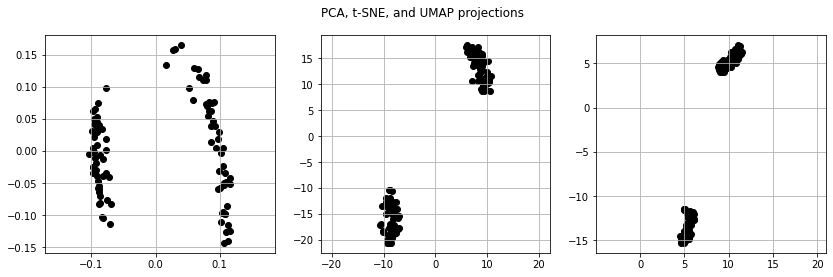

In [7]:
fig, axs = plt.subplots(1,3, figsize=(14,4))
plt.axis('equal')
axs[0].scatter(X_pca[:,0], X_pca[:,1], c='black')
axs[0].set_aspect('equal',adjustable='datalim')
axs[0].grid(True)

axs[1].scatter(X_tsne[:,0], X_tsne[:,1], c='black')
axs[1].set_aspect('equal',adjustable='datalim')
axs[1].grid(True)

axs[2].scatter(X_umap[:,0], X_umap[:,1], c='black')
axs[2].set_aspect('equal',adjustable='datalim')
axs[2].grid(True)


plt.axis('equal')
fig.suptitle('PCA, t-SNE, and UMAP projections')

#plt.savefig('visuals/demo/pca_tsne_umap_projections')

In [8]:
kmeans = KMeans(n_clusters=2, random_state=i, n_init=5)
y_pred_orig = kmeans.fit_predict(X_transformed)

fig, axs = plt.subplots(1,3, figsize=(14,6))
plt.axis('equal')
axs[0].scatter(X_pca[:,0], X_pca[:,1], c=y_pred_orig)
axs[0].grid('on')
axs[0].set_aspect('equal', adjustable='box')

axs[1].scatter(X_tsne[:,0], X_tsne[:,1], c=y_pred_orig)
axs[1].grid('on')
axs[1].set_aspect('equal', adjustable='box')

axs[2].scatter(X_umap[:,0], X_umap[:,1], c=y_pred_orig)
axs[2].grid('on')
axs[2].set_aspect('equal',adjustable='box')


plt.axis('equal')
fig.suptitle('PCA, t-SNE, and UMAP projections, colored by k-means labels in original space')

NameError: name 'i' is not defined

Text(0.5, 0.98, 'PCA, t-SNE, and UMAP projections, colored by k-means labels in t-SNE/UMAP space')

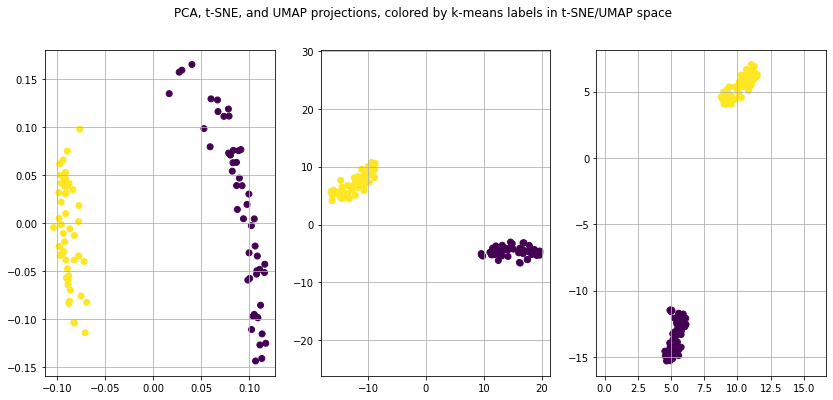

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=i, n_init=5)
y_pred_umap = kmeans.fit_predict(X_umap)

fig, axs = plt.subplots(1,3, figsize=(14,6))
plt.axis('equal')
axs[0].scatter(X_pca[:,0], X_pca[:,1], c=y_pred_umap)
axs[0].set_aspect('equal',adjustable='datalim')
axs[0].grid(True)

axs[1].scatter(X_tsne[:,0], X_tsne[:,1], c=y_pred_umap)
axs[1].set_aspect('equal',adjustable='datalim')
axs[1].grid(True)

axs[2].scatter(X_umap[:,0], X_umap[:,1], c=y_pred_umap)
axs[2].set_aspect('equal',adjustable='datalim')
axs[2].grid(True)


plt.axis('equal')
fig.suptitle('PCA, t-SNE, and UMAP projections, colored by k-means labels in t-SNE/UMAP space')

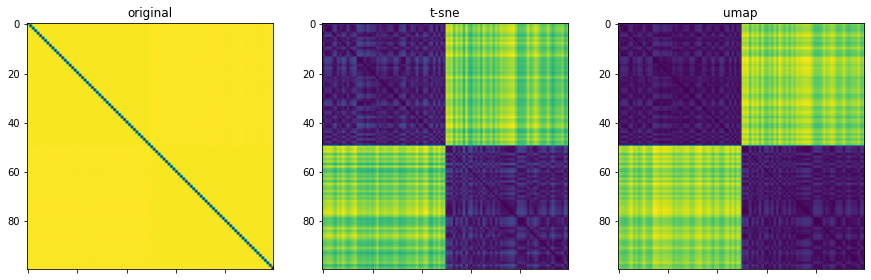

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

fig, axs = plt.subplots(1, 3, figsize=(15, 8))


axs[0].imshow(  squareform(pdist(X_transformed, metric='euclidean'))  )
axs[0].set_title("original")
axs[0].set_xticklabels([]) 

axs[1].imshow(  squareform(pdist(X_tsne, metric='euclidean'))  )
axs[1].set_title("t-sne")
axs[1].set_xticklabels([]) 

axs[2].imshow(  squareform(pdist(X_umap, metric='euclidean'))  )
axs[2].set_title("umap")
axs[2].set_xticklabels([]) 

#fig.suptitle('interpoint distance matrices')

plt.savefig('DEMO_pca_tsne_umap_distances')

In [ ]:
im = plt.imshow(  squareform(pdist(X_transformed, metric='euclidean'))  )
plt.colorbar(im)
plt.title("Original")
plt.xticks([]) 
plt.yticks([]) 
plt.savefig('visuals/demo/original_distances.png')
plt.close()

plt.imshow(  squareform(pdist(X_tsne, metric='euclidean'))  )
plt.title("t-SNE")
plt.xticks([]) 
plt.yticks([]) 
plt.savefig('visuals/demo/tsne_distances.png')
plt.close()

plt.imshow(  squareform(pdist(X_umap, metric='euclidean'))  )
plt.title("UMAP")
plt.xticks([]) 
plt.yticks([]) 
plt.savefig('visuals/demo/umap_distances.png')
plt.close()


plt.scatter(X_tsne[:,0], X_tsne[:,1], c='black')
plt.gca().set_aspect('equal',adjustable='datalim')
plt.grid(True)
plt.title('t-SNE')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.savefig('visuals/demo/tsne_plot.png')
plt.close()

plt.scatter(X_umap[:,0], X_umap[:,1], c='black')
plt.gca().set_aspect('equal',adjustable='datalim')
plt.grid(True)
plt.title('UMAP')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.savefig('visuals/demo/umap_plot.png')
plt.close()


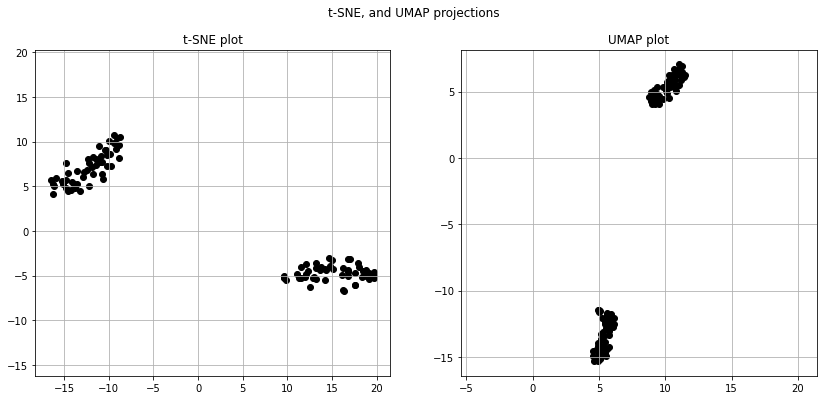

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(14,6))
plt.axis('equal')

axs[0].scatter(X_tsne[:,0], X_tsne[:,1], c='black')
axs[0].set_aspect('equal',adjustable='datalim')
axs[0].grid(True)
axs[0].set_title('t-SNE plot')

axs[1].scatter(X_umap[:,0], X_umap[:,1], c='black')
axs[1].set_aspect('equal',adjustable='datalim')
axs[1].grid(True)
axs[1].set_title('UMAP plot')


plt.axis('equal')
fig.suptitle('t-SNE, and UMAP projections')

#plt.savefig('visuals/demo/tsne_umap_projections')

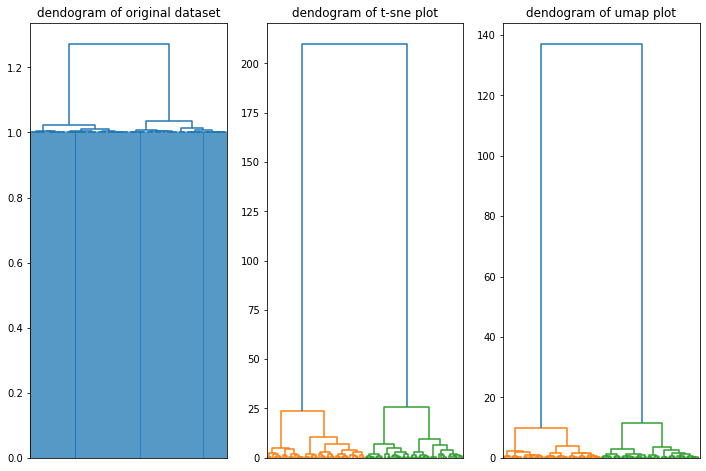

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 8))

Z = linkage(X_transformed, method='ward')
_ = dendrogram(Z, ax=axs[0])
axs[0].set_title("dendogram of original dataset")
axs[0].set_xticklabels([]) 

Z_tsne = linkage(X_tsne, method='ward')
_ = dendrogram(Z_tsne, ax=axs[1])
axs[1].set_title("dendogram of t-sne plot")
axs[1].set_xticklabels([]) 

Z_umap = linkage(X_umap, method='ward')
_ = dendrogram(Z_umap, ax=axs[2])
axs[2].set_title("dendogram of umap plot")
axs[2].set_xticklabels([]) 


#plt.savefig('visuals/demo/dendograms')